<a href="https://colab.research.google.com/github/gaurinaik09/global-terrorism/blob/main/globalterrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
globalterrorism=pd.read_csv(r'/content/drive/MyDrive/globalterrorismdb_0718dist.csv',encoding='latin1')

In [ ]:
globalterrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
globalterrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
globalterrorism.shape

(181691, 135)

In [ ]:
globalterrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','attacktype1_txt':'AttackType','country_txt':'Country',
                                'region_txt':'Region','city':'City','targtype1_txt':'TargetType','gname':'Gname','gname2':'Gname2','gname3':'Gname3',
                                'weaptype1_txt':'WeaponType','weapsubtype1_txt':'WeaponSubType','nkill':'Kill','nkillus':'Nkillus','nkillter':'Nkillter',
                                'nwound':'Wound','nwoundus':'Nwoundus','ishostkid':'Ishostkid','hostkidoutcome':'Hostkidoutcome','weapdetail':'WeaponDetail'}
                       ,inplace=True)

In [ ]:
globalterrorism.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,Region,provstate,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,TargetType,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,WeaponDetail,Kill,Nkillus,Nkillter,Wound,Nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,Ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,Hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
globalterrorism.columns.values

array(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'resolution', 'country', 'Country', 'region', 'Region',
       'provstate', 'City', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'AttackType', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'TargetType', 'targsubtype1', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'Gname', 'gsubname', 'Gname2', 'gsubname2', 'Gname3', 'gsubname3',
       'motive', 'guncertain1', 'guncertain2', 'guncertain3',
       'individual', 'nperps'

In [ ]:
globalterrorism=globalterrorism[['Year','Month','Day','Country','Region','provstate','City','longitude','latitude','AttackType','TargetType',
                                 'targsubtype1_txt','natlty1','Gname','motive','WeaponType','WeaponSubType','Kill','Wound','WeaponDetail','Ishostkid']]

In [ ]:
globalterrorism.shape

(181691, 21)

In [ ]:
globalterrorism.columns.values

array(['Year', 'Month', 'Day', 'Country', 'Region', 'provstate', 'City',
       'longitude', 'latitude', 'AttackType', 'TargetType',
       'targsubtype1_txt', 'natlty1', 'Gname', 'motive', 'WeaponType',
       'WeaponSubType', 'Kill', 'Wound', 'WeaponDetail', 'Ishostkid'],
      dtype=object)

Text(0.5, 1.0, 'Attacks per year')

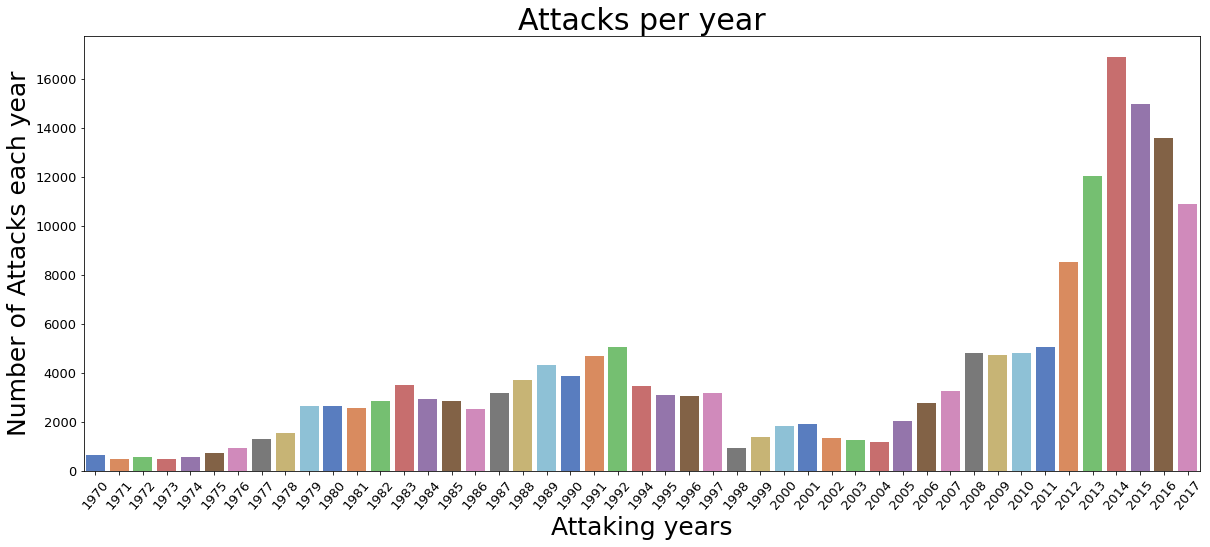

In [ ]:
Year=globalterrorism['Year'].unique()
Year_Count=globalterrorism['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,8))
sns.barplot(x=Year,y=Year_Count,palette='muted')
plt.xticks(rotation=50,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Attaking years",fontsize=25)
plt.ylabel("Number of Attacks each year",fontsize=25)
plt.title("Attacks per year",fontsize=30)

Text(0.5, 1.0, 'Terrorist Attacks per Country')

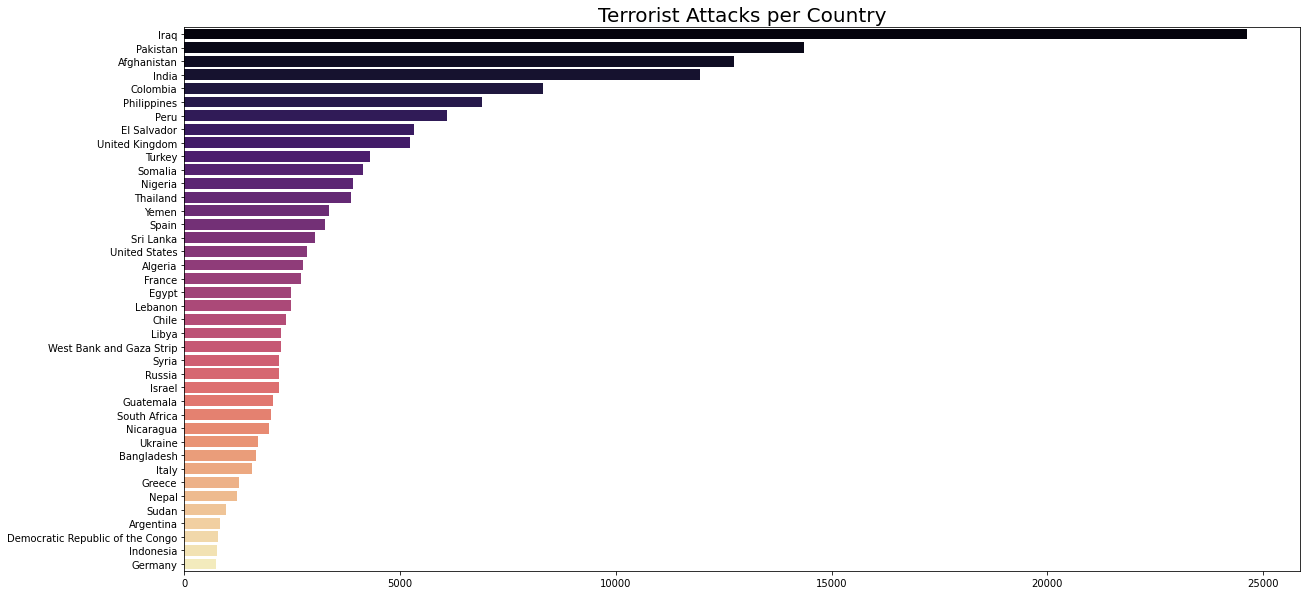

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(x=globalterrorism['Country'].value_counts()[:40].values,
            y=globalterrorism['Country'].value_counts()[:40].index,palette='magma')
plt.title('Terrorist Attacks per Country',fontsize=20)

Text(0.5, 0, 'Years')

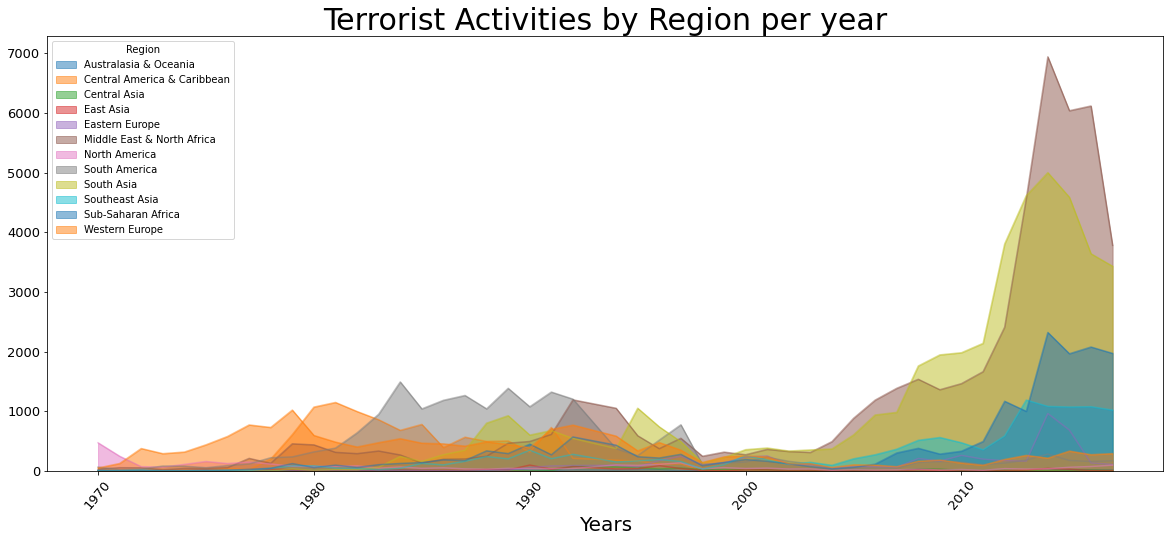

In [ ]:
pd.crosstab(globalterrorism.Year,globalterrorism.Region).plot(kind='area',stacked=False,figsize=(20,8))
plt.xticks(rotation=50,fontsize=13)
plt.yticks(fontsize=13)
plt.title("Terrorist Activities by Region per year",fontsize=30)
plt.xlabel("Years",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Cities attacked by terrorist')

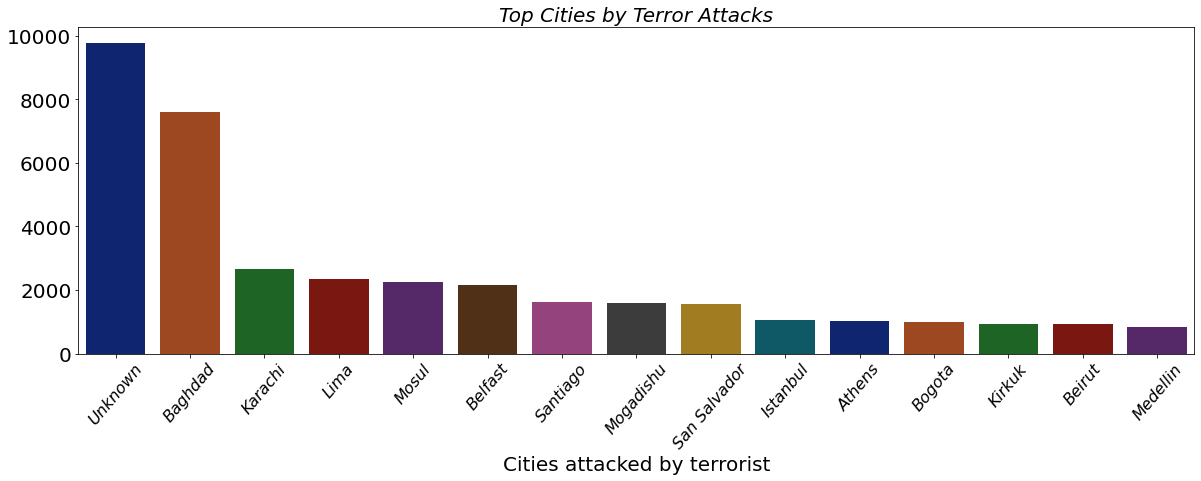

In [ ]:
plt.subplots(figsize=(20,6))
sns.barplot(globalterrorism['City'].value_counts()[:15].index, globalterrorism.City.value_counts()[:15].values,
           palette='dark')
plt.xticks(rotation=50,fontsize=16,fontstyle='oblique')
plt.yticks(fontsize=20)
plt.title('Top Cities by Terror Attacks',fontsize=20,fontstyle='oblique')
plt.xlabel("Cities attacked by terrorist",fontsize=20)

Text(0.5, 1.0, 'Deaths due to Terror Attacks')

<Figure size 14400x14400 with 0 Axes>

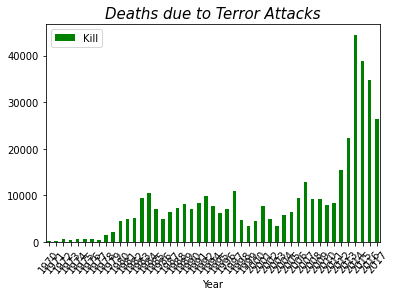

In [ ]:
data= globalterrorism[['Year','Kill']].groupby(['Year']).sum()
plt.figure(figsize=(200,200))
data.plot(kind='bar',color='green')
plt.xticks(rotation=50,fontsize=10)
plt.title('Deaths due to Terror Attacks',fontsize=15,fontstyle='italic')

Text(0, 0.5, 'Count of Attacks')

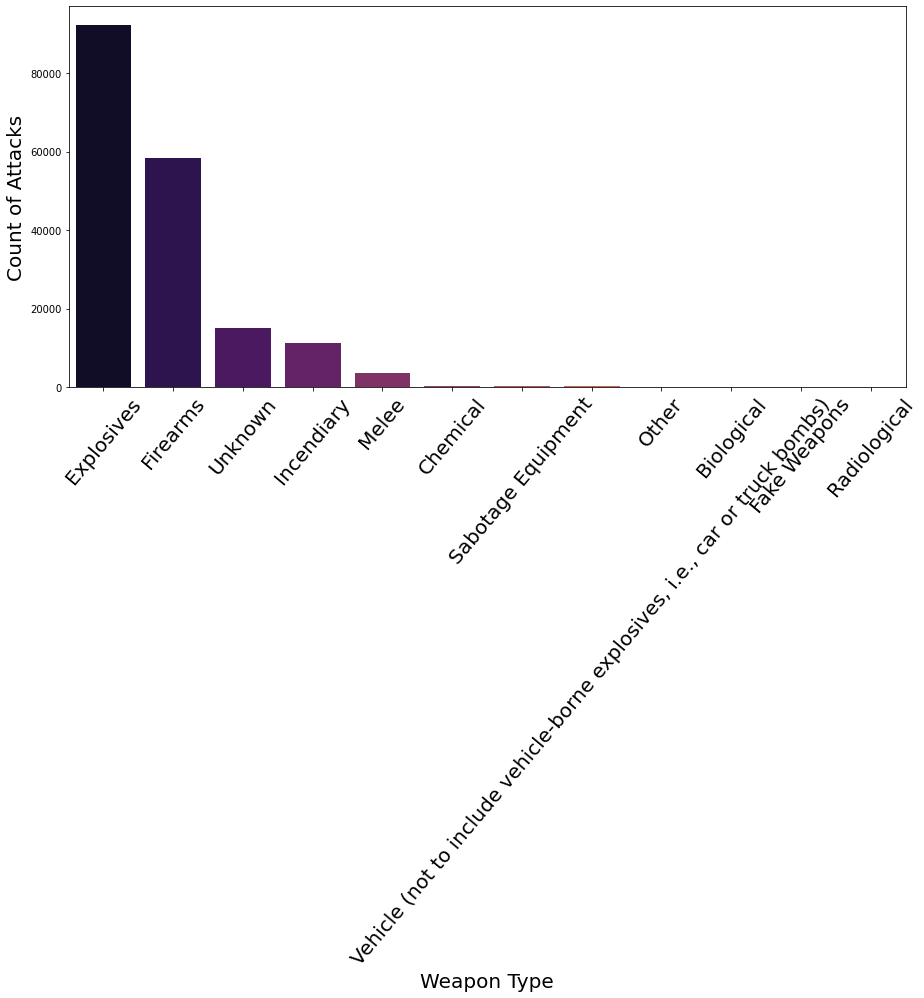

In [ ]:
plt.subplots(figsize=(15,7))
sns.countplot(x='WeaponType',data=globalterrorism,palette='inferno',order=globalterrorism['WeaponType'].value_counts().index)
plt.xticks(rotation=50,fontsize=20)
plt.xlabel('Weapon Type', fontsize=20)
plt.ylabel('Count of Attacks', fontsize=20)

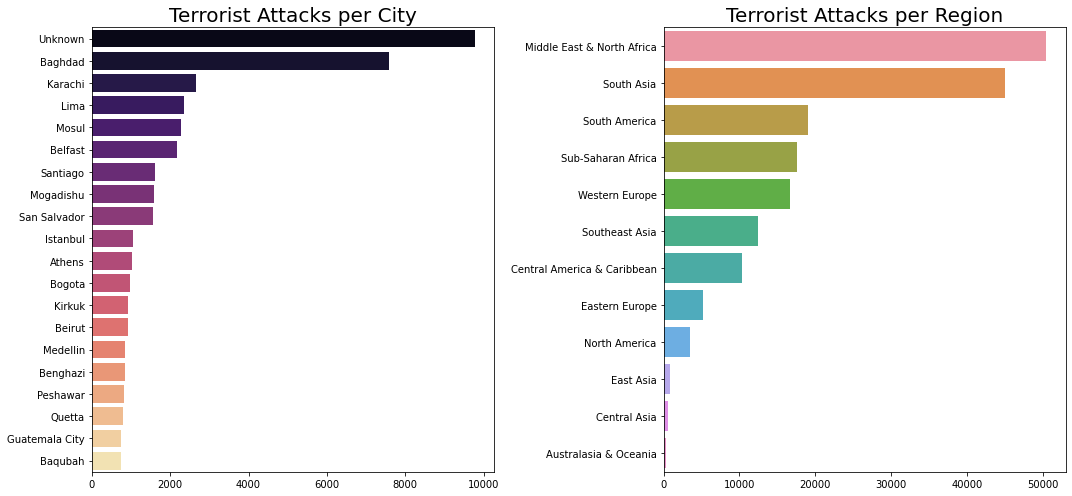

In [ ]:
fig, axes=plt.subplots(figsize=(15,7),nrows=1,ncols=2)
sns.barplot(x=globalterrorism['City'].value_counts()[:20].values,
            y=globalterrorism['City'].value_counts()[:20].index,
            ax=axes[0],palette='magma')
axes[0].set_title('Terrorist Attacks per City',fontsize=20)
sns.barplot(x=globalterrorism['Region'].value_counts().values,
           y=globalterrorism['Region'].value_counts().index,
           ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region',fontsize=20)
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of Attacks')

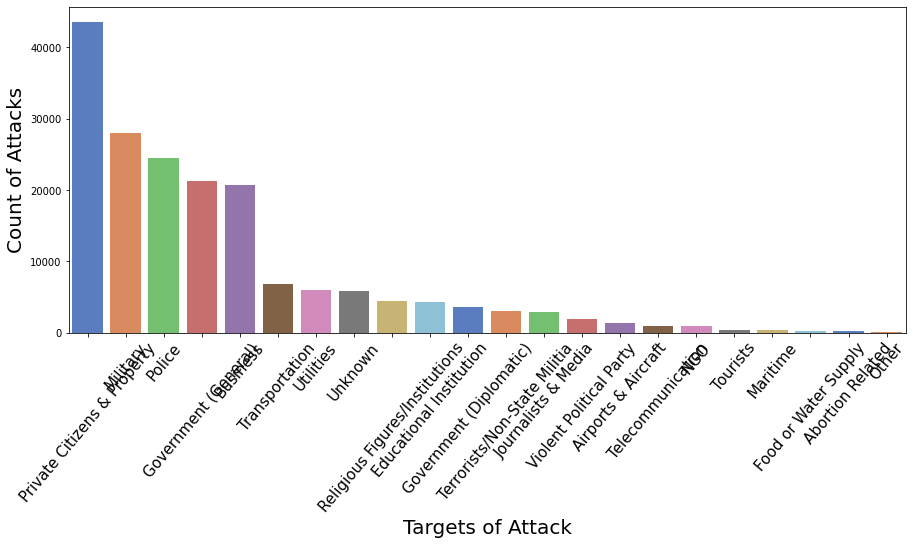

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('TargetType',data=globalterrorism,palette='muted',order=globalterrorism['TargetType'].value_counts().index)
plt.xticks(rotation=50,fontsize=15)
plt.xlabel('Targets of Attack', fontsize=20)
plt.ylabel('Count of Attacks',fontsize=20)

In [ ]:
killData = globalterrorism.loc[:,'Kill']
print('Number of Deaths by Terror Attacks :', int(sum(killData.dropna())))

Number of Deaths by Terror Attacks : 411868


In [ ]:
WoundData = globalterrorism.loc[:,'Wound']
print('Number of Wounded peoples by Terror Attacks :', int(sum(WoundData.dropna())))

Number of Wounded peoples by Terror Attacks : 523869


Text(0.5, 1.0, 'Number of kills due to differet weapons')

<Figure size 14400x14400 with 0 Axes>

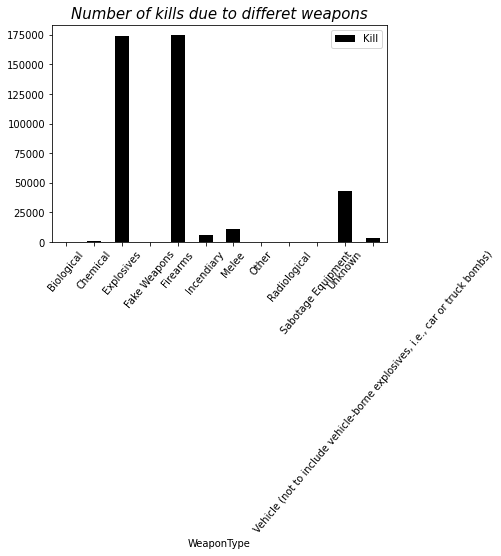

In [ ]:
data= globalterrorism[['WeaponType','Kill']].groupby(['WeaponType']).sum()
plt.figure(figsize=(200,200))
data.plot(kind='bar',color='black')
plt.xticks(rotation=50,fontsize=10)
plt.title('Number of kills due to differet weapons',fontsize=15,fontstyle='italic')

Text(0.5, 1.0, 'Number of wounded people due to differet weapons')

<Figure size 14400x14400 with 0 Axes>

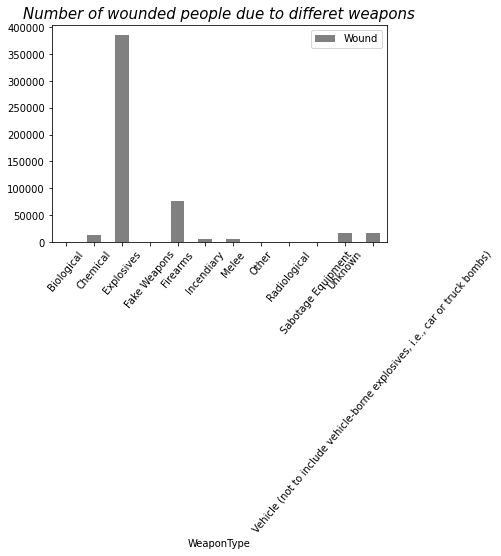

In [ ]:
data= globalterrorism[['WeaponType','Wound']].groupby(['WeaponType']).sum()
plt.figure(figsize=(200,200))
data.plot(kind='bar',color='grey')
plt.xticks(rotation=50,fontsize=10)
plt.title('Number of wounded people due to differet weapons',fontsize=15,fontstyle='italic')

Text(84.30774305555555, 0.5, 'Kills')

<Figure size 1440x720 with 0 Axes>

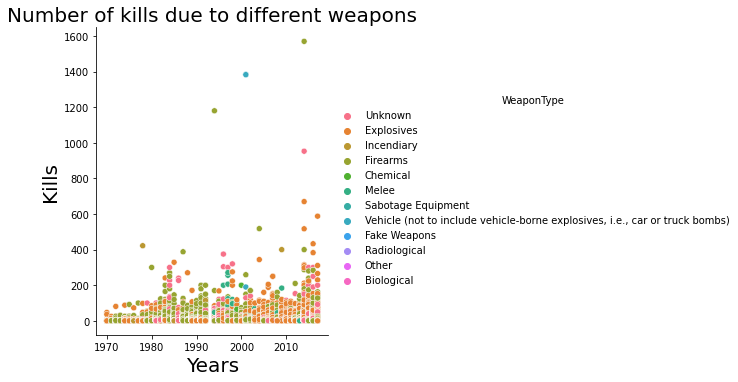

In [ ]:
plt.figure(figsize=(20,10))
sns.relplot(x='Year',y='Kill',hue='WeaponType',data=globalterrorism)
plt.title("Number of kills due to different weapons",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Kills",fontsize=20)

Text(84.16859374999999, 0.5, 'Wounded people')

<Figure size 1440x720 with 0 Axes>

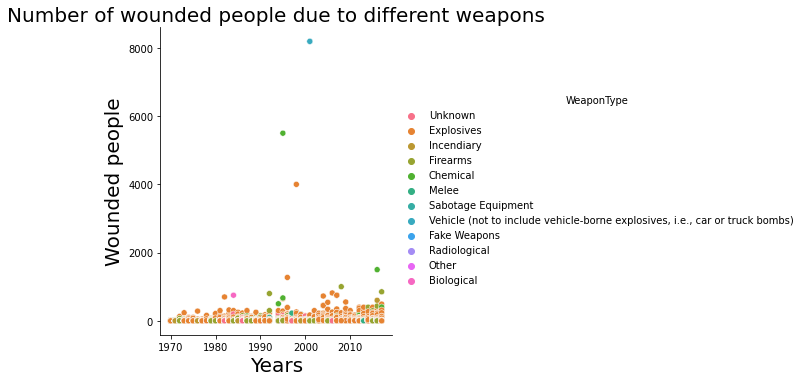

In [ ]:
plt.figure(figsize=(20,10))
sns.relplot(x='Year',y='Wound',hue='WeaponType',data=globalterrorism)
plt.title("Number of wounded people due to different weapons",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Wounded people",fontsize=20)